# Surfs Up! Homework 8

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Text(0,0.5,'Precipitation Measurement')

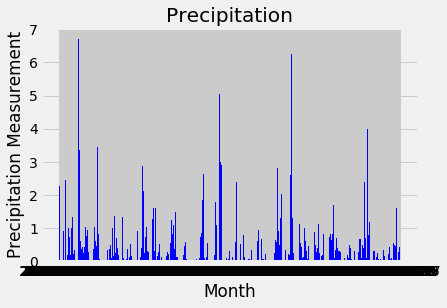

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precipitation = session.query(Measurement.date, Measurement.prcp)
# Calculate the date 1 year ago from the last data point in the database
precipitation = precipitation.filter(Measurement.date >= '2016-08-24')
# Perform a query to retrieve the data and precipitation scores
precipitation = precipitation.all()
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation = pd.DataFrame(precipitation)
#precipitation = precipitation.set_index('date')

# Sort the dataframe by date
precipitation.head()
# Use Pandas Plotting with Matplotlib to plot the data

plt.bar(precipitation["date"], precipitation["prcp"], color='blue', align="center")
plt.title("Precipitation")
plt.xlabel("Month")
plt.ylabel("Precipitation Measurement")

![precipitation](Images/precipitation.png)

In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [17]:
# Design a query to show how many stations are available in this dataset?
stat = session.query(Station.station).count()
print(f"There are {stat} stations available in the dataset")

There are 9 stations available in the dataset


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active = session.query(Measurement.station, func.count(Measurement.prcp)).group_by(Measurement.station)
activesort = active.order_by(func.count(Measurement.prcp).desc()).all()
activesort

print(f"The most active stations are: {activesort}")

The most active stations are: [('USC00519281', 2772), ('USC00513117', 2696), ('USC00519397', 2685), ('USC00519523', 2572), ('USC00516128', 2484), ('USC00514830', 1937), ('USC00511918', 1932), ('USC00517948', 683), ('USC00518838', 342)]


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temprequirement = session.query(Measurement.station, func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).group_by(Measurement.station).all()
temprequirement
print(f"The most active stations have the following metrics of highest temp and asg temp: {temprequirement}")

The most active stations have the following metrics of highest temp and asg temp: [('USC00511918', 53.0, 87.0, 71.61596766043456), ('USC00513117', 59.0, 85.0, 72.68918420081211), ('USC00514830', 58.0, 85.0, 74.8732970027248), ('USC00516128', 58.0, 84.0, 70.91500765696784), ('USC00517948', 58.0, 87.0, 74.68440233236151), ('USC00518838', 58.0, 83.0, 72.72407045009784), ('USC00519281', 54.0, 85.0, 71.66378066378067), ('USC00519397', 56.0, 87.0, 74.55323054331865), ('USC00519523', 56.0, 85.0, 74.5436493068565)]


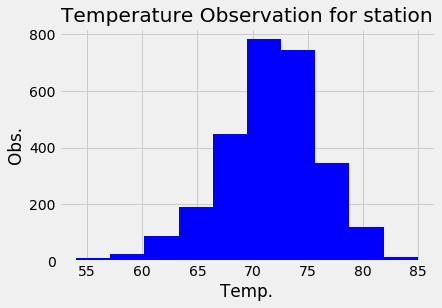

In [30]:
# Choose the station with the highest number of temperature observations.
highesttemp = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
highesttemp
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
months12 = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.station=="USC00519281").all()
months12 = pd.DataFrame(months12)
#df_months12.head()

plt.hist(months12['tobs'], color='blue')
plt.xlabel('Temp.')
plt.ylabel('Obs.')
plt.title('Temperature Observation for station')
plt.show()


![precipitation](Images/station-histogram.png)

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_temps= calc_temps('2017-02-28', '2017-03-05')
print(f"The min, avg and max temperature from the previous trip are: {trip_temps}")

The min, avg and max temperature from the previous trip are: [(64.0, 72.02777777777777, 78.0)]


TypeError: unsupported operand type(s) for -: 'function' and 'float'

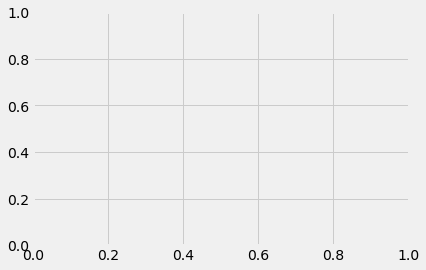

In [40]:
# Plot the results from your previous query as a bar chart. 
plt.bar(calc_temps,trip_temps, color='blue')

# Use "Trip Avg Temp" as your Title
plt.title('Trip Avg Temp')
# Use the average temperature for the y value

# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.show()

In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
